# **Bidirectional LSTM**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')
df['error'] = df['Tsp1'] - df['T1']
df

,tm,Q1,T1,Tsp1,error
0,0.000000,0.000000,23.799,25.0,1.201
1,1.000905,12.250417,23.799,25.0,1.201
2,1.991938,12.488464,23.799,25.0,1.201
3,2.992854,12.728884,23.799,25.0,1.201
4,3.983864,12.966924,23.799,25.0,1.201
...,...,...,...,...,...
14394,19615.897024,38.261067,50.225,50.0,-0.225
14395,19617.325029,38.196807,50.225,50.0,-0.225
14396,19619.059870,38.118739,50.225,50.0,-0.225
14397,19620.619680,38.048548,50.225,50.0,-0.225


In [3]:
X = df[['T1', 'error']].values
y = df[['Q1']].values

## **Preprocessing**

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

scaler_x = MinMaxScaler()
x_scaled = scaler_x.fit_transform(X)
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y)

window = 60
X_lstm = []
y_lstm = []

for i in range(window, len(X)):
    X_lstm.append(x_scaled[i-window:i])
    y_lstm.append(y_scaled[i])

X_lstm, y_lstm = np.array(X_lstm), np.array(y_lstm)

X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_lstm, test_size=0.2, shuffle=False)

## **Modeling of network neural**

In [5]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True)))
model.add(Dropout(rate=0.1))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

result = model.fit(X_train, y_train, verbose=1, epochs=200, validation_split=0.2, batch_size=100)
model.save('LSTM_bidirectional.h5')

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Epoch 1/200


2022-08-18 03:58:30.495851: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-08-18 03:58:30.495989: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-08-18 03:58:30.682392: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-08-18 03:58:32.788902: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 03:58:33.082456: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 03:58:33.142051: I tensorflow/core/grappler/o

92/92 [==============================] - ETA: 0s - loss: 0.0393

2022-08-18 03:58:41.320561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 03:58:41.429670: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-08-18 03:58:41.440195: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


92/92 [==============================] - 12s 55ms/step - loss: 0.0393 - val_loss: 0.0295
Epoch 2/200
92/92 [==============================] - 4s 41ms/step - loss: 0.0228 - val_loss: 0.0195
Epoch 3/200
92/92 [==============================] - 4s 42ms/step - loss: 0.0150 - val_loss: 0.0184
Epoch 4/200
92/92 [==============================] - 4s 42ms/step - loss: 0.0134 - val_loss: 0.0148
Epoch 5/200
92/92 [==============================] - 4s 41ms/step - loss: 0.0127 - val_loss: 0.0146
Epoch 6/200
92/92 [==============================] - 4s 41ms/step - loss: 0.0116 - val_loss: 0.0131
Epoch 7/200
92/92 [==============================] - 4s 41ms/step - loss: 0.0094 - val_loss: 0.0106
Epoch 8/200
92/92 [==============================] - 4s 41ms/step - loss: 0.0075 - val_loss: 0.0077
Epoch 9/200
92/92 [==============================] - 4s 41ms/step - loss: 0.0066 - val_loss: 0.0072
Epoch 10/200
92/92 [==============================] - 4s 41ms/step - loss: 0.0056 - val_loss: 0.0064
Epoch 11/2

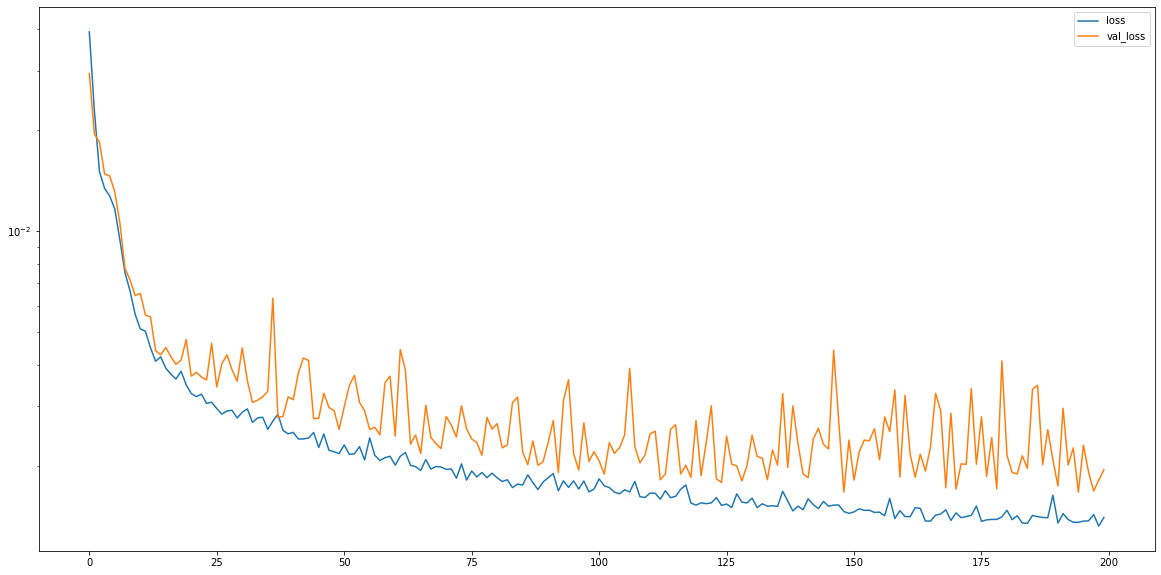

In [6]:
plt.figure(figsize=(20,10))
plt.semilogy(result.history['loss'], label='loss')
plt.semilogy(result.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

## **Metrics**

In [11]:
from sklearn.metrics import mean_squared_error

predict = model.predict(X_test)
predict = scaler_y.inverse_transform(predict[:,-1,:].reshape(-1,1))
y_t = scaler_y.inverse_transform(y_test)
print("MSE: ", mean_squared_error(predict[:,0], y_t))

90/90 [==============================] - 2s 22ms/step
MSE:  30.929680921791885


## **Comparing results**

[]

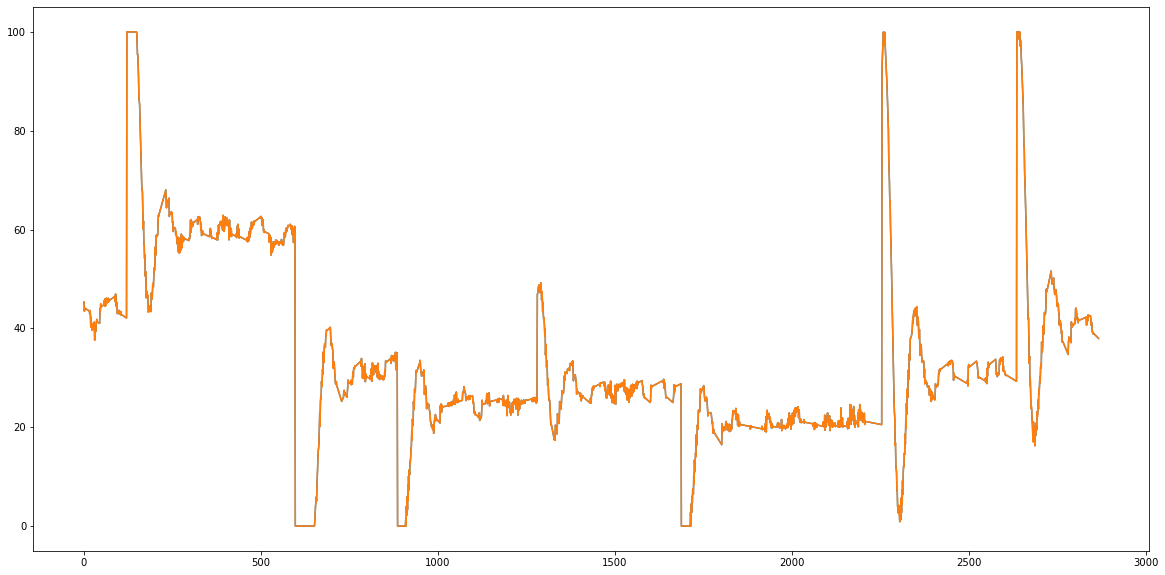

In [13]:
X_test_us = scaler_x.inverse_transform(X_test[:,-1,:])
y_test_us = scaler_y.inverse_transform(y_test)
plt.figure(figsize=(20,10))
plt.plot(y_t)
plt.plot(y_test_us)
plt.plot()